In [131]:
install.packages("maps")


The downloaded binary packages are in
	/var/folders/1d/53kd6zpn72jbr2x8b7thj7t00000gn/T//RtmpGtuoA0/downloaded_packages


also installing the dependencies ‘RWekajars’, ‘rJava’, ‘entropy’, ‘randomForest’, ‘RWeka’





The downloaded binary packages are in
	/var/folders/1d/53kd6zpn72jbr2x8b7thj7t00000gn/T//RtmpGtuoA0/downloaded_packages


In [153]:
install.packages("caret")


The downloaded binary packages are in
	/var/folders/1d/53kd6zpn72jbr2x8b7thj7t00000gn/T//RtmpGtuoA0/downloaded_packages


In [160]:
# Importing necessary libraries
library("tidyverse")
library("ggplot2")
library("ggrepel")
library("ggcorrplot")
library("DT")
library(dplyr)
library(tidyr)
library(stringr)
library(maps)
library(caret)
library(rpart)

# Data Preparation

## Global Mobility Dataset

In [5]:
# Retrieve "COVID-19_global_mobility.csv" file
dataset_global_mobility <- read.csv("https://www.dropbox.com/scl/fi/x4i3ah1gmt4kryrrq0c8m/Global_Mobility_Report.csv?rlkey=tt4i5q1zss7e8ly2zmn8xvhc2&st=xnxrxz2d&dl=1")

In [6]:
# Convert the date column from character to Date format
dataset_global_mobility <- dataset_global_mobility %>%
  mutate(date = as.Date(date, format = "%Y-%m-%d"))

# Filter the dataset to include only rows with the date "2021-01-19"
dataset_global_mobility_updated <- dataset_global_mobility %>%
  filter(date == as.Date("2021-01-19"))

In [ ]:
summary(dataset_global_mobility_updated$date)

Only the observations from 1/19/2021 are in the global datset now.

In [109]:
# count of observations in the updated global mobility dataset
nrow(dataset_global_mobility_updated)

[1] 13122

In [110]:
# Filter the dataset to include only rows where sub_region_2 is "Texas"
dataset_global_mobility_updated <- dataset_global_mobility_updated %>%
  filter(sub_region_1 == "Texas")

In [113]:
length(unique(dataset_global_mobility_updated$sub_region_2))

[1] 205

In [114]:
# remove the rows with missing value in the county_name column
dataset_global_mobility_updated <- dataset_global_mobility_updated %>%
  filter(!is.na(sub_region_2))

In [115]:
# Remove the first row using slice
dataset_global_mobility_updated <- dataset_global_mobility_updated %>%
  slice(-1)

In [116]:
length(unique(dataset_global_mobility_updated$sub_region_2))

[1] 204

In [117]:
write.csv(dataset_global_mobility_updated, "dataset_global_mobility_updated.csv", row.names = FALSE )

## COVID-19 Plus Census Dataset

In [119]:
# Retrieve "COVID-19_cases_plus_census.csv" file
dataset_plus_census <- read.csv("https://raw.githubusercontent.com/yamphurai/Project2_ClusterAnalysis/refs/heads/main/updated_COVID-19_cases_plus_census.csv")

In [120]:
#filter the dataset by Texas
dataset_plus_census <- dataset_plus_census %>% filter(state == "TX")

In [121]:
length(unique(dataset_plus_census$county_name))

[1] 254

In [122]:
head(dataset_plus_census$county_name)

[1] "Hansford County"  "Stonewall County" "Cochran County"   "Crockett County" 
[5] "McCulloch County" "Sherman County"

In [123]:
# Extract unique names from both columns
sub_region_2_names <- unique(dataset_global_mobility_updated$sub_region_2)
county_names <- unique(dataset_plus_census$county_name)

# Find names that are in county_names but not in sub_region_2_names
missing_in_sub_region_2 <- setdiff(county_names, sub_region_2_names)

# Display the missing names
print(missing_in_sub_region_2)
length(unique(missing_in_sub_region_2))

 [1] "Hansford County"      "Stonewall County"     "Cochran County"      
 [4] "Crockett County"      "King County"          "Briscoe County"      
 [7] "Cottle County"        "Sutton County"        "Menard County"       
[10] "Jim Hogg County"      "Loving County"        "Edwards County"      
[13] "Kinney County"        "Armstrong County"     "Foard County"        
[16] "Irion County"         "Glasscock County"     "Baylor County"       
[19] "Sterling County"      "Dickens County"       "Mills County"        
[22] "Collingsworth County" "Schleicher County"    "Throckmorton County" 
[25] "Shackelford County"   "Knox County"          "Wheeler County"      
[28] "Upton County"         "Hemphill County"      "Floyd County"        
[31] "Donley County"        "Fisher County"        "Lipscomb County"     
[34] "Delta County"         "Concho County"        "Garza County"        
[37] "Hudspeth County"      "Real County"          "San Saba County"     
[40] "Kenedy County"        "Hartley C

[1] 50

In [124]:
# Remove the rows from dataset_plus_census where county_name is in names_to_remove
dataset_plus_census <- dataset_plus_census %>%
  filter(!county_name %in% missing_in_sub_region_2)

In [125]:
# remove the rows with missing value in the county_name column
dataset_plus_census <- dataset_plus_census %>%
  filter(!is.na(county_name))

In [126]:
length(unique(dataset_plus_census$county_name))

[1] 204

In [127]:
write.csv(dataset_plus_census, "dataset_plus_census.csv", row.names = FALSE )

Finally the two datasets are ready to be merged.

## Final Dataset

In [129]:
# Sort dataset_plus_census by county_name in ascending order
dataset_plus_census_sorted <- dataset_plus_census %>%
  arrange(county_name)

# Sort dataset_global_mobility_updated by sub_region_2 in ascending order
dataset_global_mobility_updated_sorted <- dataset_global_mobility_updated %>%
  arrange(sub_region_2)

# Merge the datasets column-wise
dataset <- cbind(dataset_plus_census_sorted, dataset_global_mobility_updated_sorted)


In [131]:
head(dataset, 10)

,state,state_fips_code,county_name,confirmed_cases,deaths,total_pop,male_pop,female_pop,white_pop,black_pop,⋯,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>
1,TX,48,Anderson County,5575,75,57747,35292,22455,34468,12075,⋯,,,48001,2021-01-19,-15,-17,NA,NA,-18,6
2,TX,48,Andrews County,1606,37,17577,8980,8597,7229,265,⋯,,,48003,2021-01-19,-28,NA,NA,14,-25,NA
3,TX,48,Angelina County,6765,193,87700,42707,44993,53704,12878,⋯,,,48005,2021-01-19,-13,-9,NA,-6,-20,8
4,TX,48,Aransas County,895,26,24832,12448,12384,16803,390,⋯,,,48007,2021-01-19,-16,1,-23,NA,-21,6
5,TX,48,Archer County,694,10,8793,4335,4458,7787,74,⋯,,,48009,2021-01-19,NA,NA,NA,NA,-17,NA
6,TX,48,Atascosa County,3781,90,48139,24051,24088,16480,353,⋯,,,48013,2021-01-19,-13,-13,NA,NA,-26,11
7,TX,48,Austin County,1404,18,29292,14474,14818,18533,2601,⋯,,,48015,2021-01-19,-10,-1,NA,NA,-18,7
8,TX,48,Bailey County,742,15,7098,3678,3420,2459,108,⋯,,,48017,2021-01-19,NA,NA,NA,NA,-22,NA
9,TX,48,Bandera County,820,20,21316,10570,10746,16788,213,⋯,,,48019,2021-01-19,NA,NA,NA,NA,-24,11


In [136]:
# Check for missing values in each column
missing_values <- colSums(is.na(dataset))

# Print the names of columns that have missing values
columns_with_missing_values <- names(missing_values[missing_values > 0])

# Print the names of columns with missing values
print("Columns with missing values:")
print(columns_with_missing_values)

[1] "Columns with missing values:"
[1] "retail_and_recreation_percent_change_from_baseline"
[2] "grocery_and_pharmacy_percent_change_from_baseline" 
[3] "parks_percent_change_from_baseline"                
[4] "transit_stations_percent_change_from_baseline"     
[5] "workplaces_percent_change_from_baseline"           
[6] "residential_percent_change_from_baseline"          


In [143]:
print("Total number of observations: ")
print(nrow(dataset))

#Count of missing values in these columns
sum(is.na(dataset["retail_and_recreation_percent_change_from_baseline"]))
sum(is.na(dataset["grocery_and_pharmacy_percent_change_from_baseline"]))
sum(is.na(dataset["parks_percent_change_from_baseline"]))
sum(is.na(dataset["transit_stations_percent_change_from_baseline"]))
sum(is.na(dataset["workplaces_percent_change_from_baseline"]))
sum(is.na(dataset["residential_percent_change_from_baseline"]))

[1] "Total number of observations: "
[1] 204


[1] 91

[1] 104

[1] 155

[1] 114

[1] 9

[1] 93

Since most of these feature columns have too many missing values, we will be replacing them with the average value from their corresponding column.

In [145]:
# Replace the missing values with mean values
mean_value_retail <- mean(dataset$retail_and_recreation_percent_change_from_baseline, na.rm = TRUE)
dataset$retail_and_recreation_percent_change_from_baseline[is.na(dataset$retail_and_recreation_percent_change_from_baseline)] <- mean_value_retail

mean_value_grocery_pharmacy <- mean(dataset$grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE)
dataset$grocery_and_pharmacy_percent_change_from_baseline[is.na(dataset$grocery_and_pharmacy_percent_change_from_baseline)] <- mean_value_grocery_pharmacy

mean_value_parks <- mean(dataset$parks_percent_change_from_baseline, na.rm = TRUE)
dataset$parks_percent_change_from_baseline[is.na(dataset$parks_percent_change_from_baseline)] <- mean_value_parks

mean_value_transit_stations <- mean(dataset$transit_stations_percent_change_from_baseline, na.rm = TRUE)
dataset$transit_stations_percent_change_from_baseline[is.na(dataset$transit_stations_percent_change_from_baseline)] <- mean_value_transit_stations

mean_value_workplaces <- mean(dataset$workplaces_percent_change_from_baseline, na.rm = TRUE)
dataset$workplaces_percent_change_from_baseline[is.na(dataset$workplaces_percent_change_from_baseline)] <- mean_value_workplaces

mean_value_residential <- mean(dataset$residential_percent_change_from_baseline, na.rm = TRUE)
dataset$residential_percent_change_from_baseline[is.na(dataset$residential_percent_change_from_baseline)] <- mean_value_residential

In [146]:
#Check for the missing values in the updated coloumns
sum(is.na(dataset["retail_and_recreation_percent_change_from_baseline"]))
sum(is.na(dataset["grocery_and_pharmacy_percent_change_from_baseline"]))
sum(is.na(dataset["parks_percent_change_from_baseline"]))
sum(is.na(dataset["transit_stations_percent_change_from_baseline"]))
sum(is.na(dataset["workplaces_percent_change_from_baseline"]))
sum(is.na(dataset["residential_percent_change_from_baseline"]))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [148]:
names(dataset)

[1] "state"                                             
 [2] "state_fips_code"                                   
 [3] "county_name"                                       
 [4] "confirmed_cases"                                   
 [5] "deaths"                                            
 [6] "total_pop"                                         
 [7] "male_pop"                                          
 [8] "female_pop"                                        
 [9] "white_pop"                                         
[10] "black_pop"                                         
[11] "asian_pop"                                         
[12] "hispanic_pop"                                      
[13] "amerindian_pop"                                    
[14] "other_race_pop"                                    
[15] "median_income"                                     
[16] "income_less_50K"                                   
[17] "income_50K_100K"                                   
[18] "income_100K_150K"                                  
[19] "income_150K_more"                                  
[20] "rent_under_50_percent"                             
[21] "rent_over_50_percent"                              
[22] "median_age"                                        
[23] "male_0_20"                                         
[24] "male_21_49"                                        
[25] "male_50_above"                                     
[26] "female_0_20"                                       
[27] "female_21_49"                                      
[28] "female_50_above"                                   
[29] "unemployed_pop"                                    
[30] "employed_pop"                                      
[31] "commute"                                           
[32] "worked_at_home"                                    
[33] "walked_to_work"                                    
[34] "country_region_code"                               
[35] "country_region"                                    
[36] "sub_region_1"                                      
[37] "sub_region_2"                                      
[38] "metro_area"                                        
[39] "iso_3166_2_code"                                   
[40] "census_fips_code"                                  
[41] "date"                                              
[42] "retail_and_recreation_percent_change_from_baseline"
[43] "grocery_and_pharmacy_percent_change_from_baseline" 
[44] "parks_percent_change_from_baseline"                
[45] "transit_stations_percent_change_from_baseline"     
[46] "workplaces_percent_change_from_baseline"           
[47] "residential_percent_change_from_baseline"

In [150]:
# Drop the specified columns
dataset <- dataset %>% select(-state, -state_fips_code, -country_region_code, -country_region, -sub_region_1, -sub_region_2, -metro_area, 
                              -iso_3166_2_code, -census_fips_code, -date)

In [170]:
summary(dataset)

          county_name  confirmed_cases        deaths         total_pop      
 Anderson County:  1   Min.   :    70.0   Min.   :   2.0   Min.   :    600  
 Andrews County :  1   1st Qu.:   941.5   1st Qu.:  21.0   1st Qu.:  12635  
 Angelina County:  1   Median :  1889.5   Median :  45.5   Median :  24898  
 Aransas County :  1   Mean   : 10424.4   Mean   : 157.0   Mean   : 133668  
 Archer County  :  1   3rd Qu.:  5066.5   3rd Qu.: 103.8   3rd Qu.:  66671  
 Atascosa County:  1   Max.   :286356.0   Max.   :3825.0   Max.   :4525519  
 (Other)        :198                                                        
    male_pop         female_pop        white_pop         black_pop       
 Min.   :    321   Min.   :    279   Min.   :    292   Min.   :     0.0  
 1st Qu.:   6365   1st Qu.:   5955   1st Qu.:   6792   1st Qu.:   269.5  
 Median :  12552   Median :  12336   Median :  14862   Median :  1375.5  
 Mean   :  66364   Mean   :  67304   Mean   :  57194   Mean   : 15664.0  
 3rd Qu.:  340

In [748]:
write.csv(dataset, "datset_summary.csv", row.names = FALSE)

In [171]:
# Save the dataset
write.csv(dataset, "dataset.csv", row.names = FALSE )

## Pick features & evaluate correlations

In [947]:
dataset <- read.csv("dataset.csv")

In [949]:
# Make character factors for analysis
dataset <- dataset %>% mutate_if(is.character, factor)

# Calculate rates (per 10,000 people)
dataset <- dataset %>% filter(confirmed_cases > 0) 
dataset <- dataset %>% mutate(
  cases_per_10000 = confirmed_cases/total_pop*10000, 
  deaths_per_10000 = deaths/total_pop*10000, 
  death_per_case = deaths/confirmed_cases)

In [905]:
# Check for the added columns
names(dataset)

[1] "county_name"                                       
 [2] "confirmed_cases"                                   
 [3] "deaths"                                            
 [4] "total_pop"                                         
 [5] "male_pop"                                          
 [6] "female_pop"                                        
 [7] "white_pop"                                         
 [8] "black_pop"                                         
 [9] "asian_pop"                                         
[10] "hispanic_pop"                                      
[11] "amerindian_pop"                                    
[12] "other_race_pop"                                    
[13] "median_income"                                     
[14] "income_less_50K"                                   
[15] "income_50K_100K"                                   
[16] "income_100K_150K"                                  
[17] "income_150K_more"                                  
[18] "rent_under_50_percent"                             
[19] "rent_over_50_percent"                              
[20] "median_age"                                        
[21] "male_0_20"                                         
[22] "male_21_49"                                        
[23] "male_50_above"                                     
[24] "female_0_20"                                       
[25] "female_21_49"                                      
[26] "female_50_above"                                   
[27] "unemployed_pop"                                    
[28] "employed_pop"                                      
[29] "commute"                                           
[30] "worked_at_home"                                    
[31] "walked_to_work"                                    
[32] "retail_and_recreation_percent_change_from_baseline"
[33] "grocery_and_pharmacy_percent_change_from_baseline" 
[34] "parks_percent_change_from_baseline"                
[35] "transit_stations_percent_change_from_baseline"     
[36] "workplaces_percent_change_from_baseline"           
[37] "residential_percent_change_from_baseline"          
[38] "cases_per_10000"                                   
[39] "deaths_per_10000"                                  
[40] "death_per_case"

In [951]:
# Select the features for the dataset
dataset_select <-  dataset %>% select(county_name, total_pop, hispanic_pop, black_pop, male_50_above, female_50_above,
                                      income_50K_100K, rent_over_50_percent, commute, worked_at_home, transit_stations_percent_change_from_baseline, 
                                      workplaces_percent_change_from_baseline, 
                                      cases_per_10000, deaths_per_10000, death_per_case)

In [953]:
# Normalize by population
dataset_select <- dataset_select %>% mutate(
  hispanic_pop = hispanic_pop / total_pop, 
  black_pop = black_pop / total_pop,
  male_50_above = male_50_above / total_pop, 
  female_50_above = female_50_above / total_pop, 
  income_50K_100K = income_50K_100K / total_pop, 
  rent_over_50_percent = rent_over_50_percent / total_pop, 
  commute = commute / total_pop,
  worked_at_home = worked_at_home/ total_pop, 
  )

In [820]:
summary(dataset_select)

          county_name    total_pop        hispanic_pop       black_pop      
 Anderson County:  1   Min.   :    600   Min.   :0.03454   Min.   :0.00000  
 Andrews County :  1   1st Qu.:  12635   1st Qu.:0.17705   1st Qu.:0.01504  
 Angelina County:  1   Median :  24898   Median :0.25266   Median :0.05254  
 Aransas County :  1   Mean   : 133668   Mean   :0.34352   Mean   :0.07161  
 Archer County  :  1   3rd Qu.:  66671   3rd Qu.:0.48529   3rd Qu.:0.10209  
 Atascosa County:  1   Max.   :4525519   Max.   :0.99185   Max.   :0.33743  
 (Other)        :198                                                        
 male_50_above    female_50_above  income_50K_100K   rent_over_50_percent
 Min.   :0.1067   Min.   :0.1192   Min.   :0.04964   Min.   :0.00000     
 1st Qu.:0.1564   1st Qu.:0.1698   1st Qu.:0.09331   1st Qu.:0.01207     
 Median :0.1857   Median :0.1949   Median :0.10466   Median :0.01587     
 Mean   :0.1854   Mean   :0.2004   Mean   :0.10275   Mean   :0.01745     
 3rd Qu.:0.211

In [822]:
# Check for correlation
library(seriation)

cm <- cor(dataset_select %>% select_if(is.numeric) %>% na.omit)

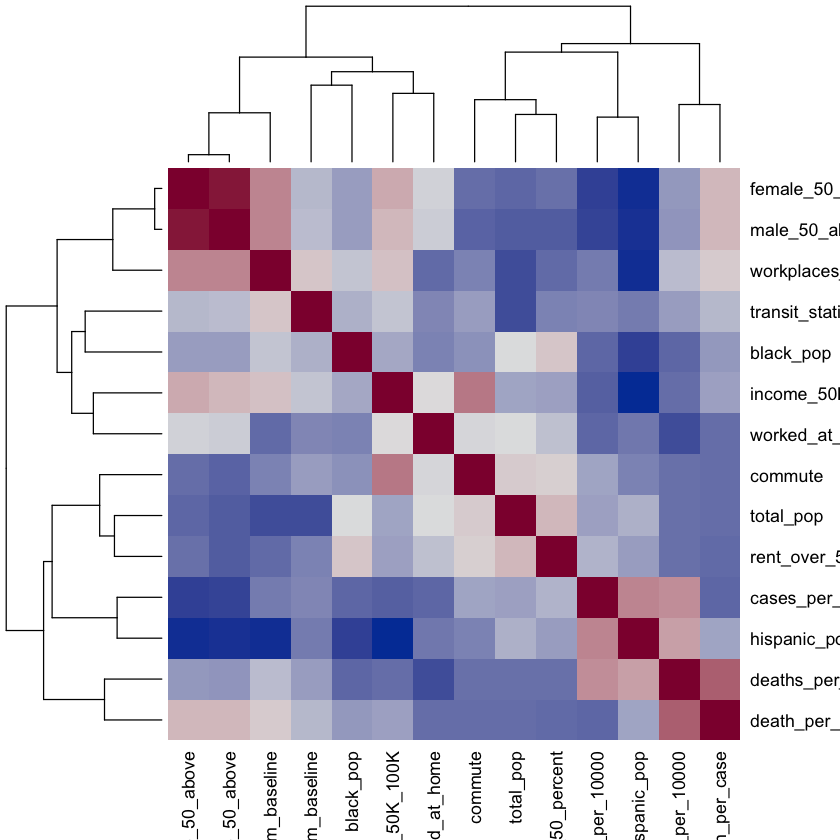

In [911]:
hmap(cm, margins = c(5,5))

## Create Class Variable

In [955]:
# Label "high" for the counties with deaths per 10000 that is greater than 16
dataset_select <- dataset_select %>% mutate(high = as.factor(deaths_per_10000 > 16))

# Check for class imbalance
dataset_select %>% pull(high) %>% table()

.
FALSE  TRUE 
  100   104 

With threshold of 16, the dataset is close to perfectly balanced.

In [915]:
# Group the counties by category in descending order
dataset_select %>% group_by(county_name) %>% 
  summarize(high_pct = sum(high == TRUE)/n()) %>%
  arrange(desc(high_pct))

county_name,high_pct
<fct>,<dbl>
Andrews County,1
Angelina County,1
Atascosa County,1
Bailey County,1
Bee County,1
Brooks County,1
Brown County,1
Callahan County,1
Cameron County,1


# Test & Train split

In [957]:
# Convert the 'county_names' column to lower case and remove "county"
dataset_select <- dataset_select %>%
  mutate(county_name = str_replace_all(tolower(county_name), " county", ""))

In [959]:
# Pick the DFW + rural (from project 2) + random counties to train
dataset_train <- dataset_select %>% filter(county_name %in% c("collin", "dallas", "denton", "ellis", "johnson", "kaufman", "parker", "rockwall", "tarrant", "wise",
                                                             "bell", "cameron", "el paso", "hidalgo", "nueces", "terry", "martin", "lubbock", "wichita", "cherokee",
                                                             "hale", "maverick", "parmer"))

In [921]:
dataset_train %>% pull(high) %>% table()

.
FALSE  TRUE 
   12    11 

Trainig dataset is balanced.

In [961]:
# Testing dataset (remaining counties)
dataset_test <-  dataset_select %>% filter(!(county_name %in% c("collin", "dallas", "denton", "ellis", "johnson", "kaufman", "parker", "rockwall", "tarrant", "wise",
                                                             "bell", "cameron", "el paso", "hidalgo", "nueces", "terry", "martin", "lubbock", "wichita", "cherokee",
                                                             "hale", "maverick", "parmer")))
dataset_test %>% pull(high) %>% table()

.
FALSE  TRUE 
   88    93 

Balanced testing dataset

# Visualization of counties with high deaths per 10000

In [963]:
# Load county map data and convert to tibble
counties <- as_tibble(map_data("county"))

# Rename the columns and select only the relevant columns
counties <- counties %>%
  rename(county = subregion) %>%
  select(county, long, lat, group)

# Add variables to the map data
counties_all <- counties %>% left_join(dataset_train %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

#checking the merged dataset
names(counties_all)

Joining with `by = join_by(county)`


[1] "county"                                       
 [2] "long"                                         
 [3] "lat"                                          
 [4] "group"                                        
 [5] "county_name"                                  
 [6] "total_pop"                                    
 [7] "hispanic_pop"                                 
 [8] "black_pop"                                    
 [9] "male_50_above"                                
[10] "female_50_above"                              
[11] "income_50K_100K"                              
[12] "rent_over_50_percent"                         
[13] "commute"                                      
[14] "worked_at_home"                               
[15] "transit_stations_percent_change_from_baseline"
[16] "workplaces_percent_change_from_baseline"      
[17] "cases_per_10000"                              
[18] "deaths_per_10000"                             
[19] "death_per_case"                               
[20] "high"

  [1] "andrews"       "angelina"      "atascosa"      "bailey"       
  [5] "bee"           "brooks"        "brown"         "callahan"     
  [9] "cameron"       "camp"          "carson"        "cass"         
 [13] "castro"        "cherokee"      "childress"     "coleman"      
 [17] "comanche"      "crane"         "crosby"        "culberson"    
 [21] "dallam"        "dawson"        "dewitt"        "deaf smith"   
 [25] "duval"         "ector"         "el paso"       "fannin"       
 [29] "fayette"       "gaines"        "gray"          "grayson"      
 [33] "gregg"         "grimes"        "hale"          "hall"         
 [37] "hamilton"      "hardeman"      "hidalgo"       "hockley"      
 [41] "hopkins"       "howard"        "hutchinson"    "jim wells"    
 [45] "jones"         "karnes"        "kleberg"       "la salle"     
 [49] "lamar"         "lamb"          "lavaca"        "lee"          
 [53] "leon"          "lubbock"       "lynn"          "marion"       
 [57] "martin"      

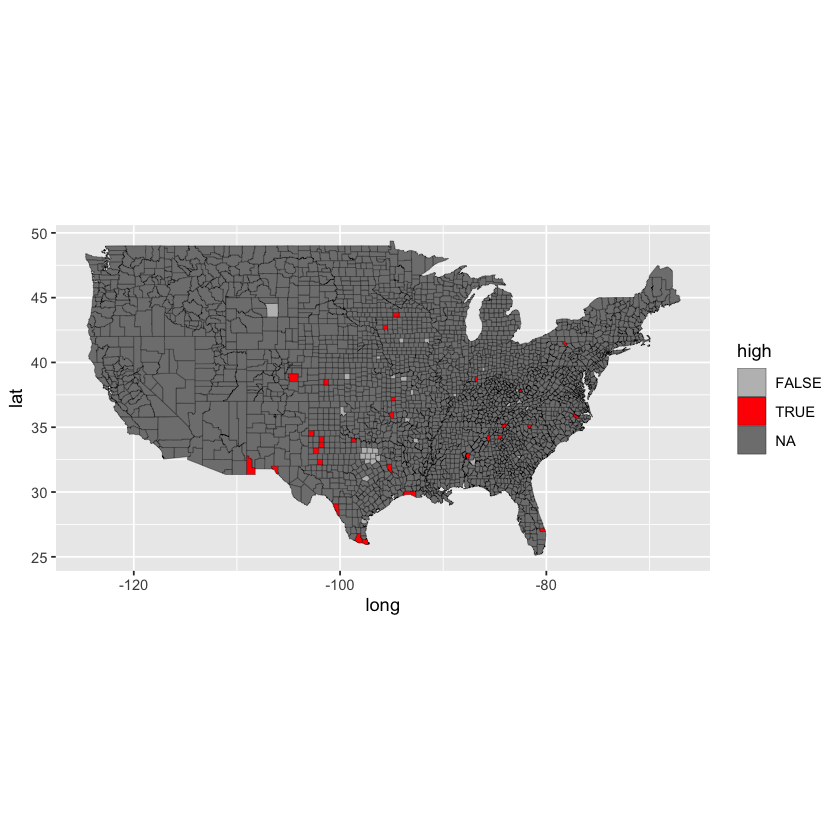

In [927]:
ggplot(counties_all, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", linewidth = 0.1) + 
    coord_quickmap() + scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

# Filter the dataset for counties with high deaths_per_10000
high_counties <- dataset_select %>% filter(high == TRUE)
print(high_counties$county_name)
print(length(unique(high_counties$county_name)))

Overview of the 104 counties with high deaths per 10,000 > 16.

# Random Forest Classifier

In [965]:
# Remove 'county_name' column for both training and testing datasets
dataset_train_for_model <- dataset_train %>% select(-county_name)
dataset_test_for_model <- dataset_test %>% select(-county_name)

In [967]:
# Check for null values in train and test datasets
sum(is.na(dataset_train_for_model))
sum(is.na(dataset_test_for_model))

[1] 0

[1] 0

In [969]:
# ensure to not have "county_name" column in training set before building the model
names(dataset_train_for_model)

[1] "total_pop"                                    
 [2] "hispanic_pop"                                 
 [3] "black_pop"                                    
 [4] "male_50_above"                                
 [5] "female_50_above"                              
 [6] "income_50K_100K"                              
 [7] "rent_over_50_percent"                         
 [8] "commute"                                      
 [9] "worked_at_home"                               
[10] "transit_stations_percent_change_from_baseline"
[11] "workplaces_percent_change_from_baseline"      
[12] "cases_per_10000"                              
[13] "deaths_per_10000"                             
[14] "death_per_case"                               
[15] "high"

In [971]:
# excluding counties as they are not useful to compare variables
random_forest_classifier <- dataset_train_for_model %>%
  train(high ~ .,
        data = .,
        method = "rf",
        trControl = trainControl(method = "cv", number = 10)
  )
random_forest_classifier

Random Forest 

23 samples
14 predictors
 2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 21, 21, 21, 21, 20, 21, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa
   2    0.9166667  0.84 
   8    0.9666667  0.94 
  14    0.9666667  0.94 

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 8.

The cross-validation results show that for all tested values of mtry (2, 8, and 14). 
The optimal value selected for the final model was mtry = 8, meaning that at each split, the algorithm will randomly select 8 features to consider for the best split.


In [977]:
# Ranking of the features for predictions in the model
varImp(random_forest_classifier)

rf variable importance

                                               Overall
deaths_per_10000                              100.0000
death_per_case                                 48.8415
commute                                        12.3261
cases_per_10000                                 8.8797
worked_at_home                                  7.2989
income_50K_100K                                 4.9351
hispanic_pop                                    4.4827
black_pop                                       0.9300
workplaces_percent_change_from_baseline         0.8181
total_pop                                       0.7227
rent_over_50_percent                            0.5329
female_50_above                                 0.2536
male_50_above                                   0.1522
transit_stations_percent_change_from_baseline   0.0000

Using this classifier, the "commute" feature has the highest importance. This means it contributes the most to the model's predictive power. In this case, the model relies heavily on the this variable to make predictions. The feature "transit_stations_percent_change_from_baseline" does not have any importance for the prediction

## Accuracy & Evaluation

In [980]:
# Use the model to predict on the test dataset. Add predicted values to column "high_predicted_RFC". Testing dataset needs "county_name" for heat map.
dataset_test$high_predicted_RFC <- predict(random_forest_classifier, dataset_test)

In [982]:
# Check for new "high_predicted_RFC" column
names(dataset_test)

[1] "county_name"                                  
 [2] "total_pop"                                    
 [3] "hispanic_pop"                                 
 [4] "black_pop"                                    
 [5] "male_50_above"                                
 [6] "female_50_above"                              
 [7] "income_50K_100K"                              
 [8] "rent_over_50_percent"                         
 [9] "commute"                                      
[10] "worked_at_home"                               
[11] "transit_stations_percent_change_from_baseline"
[12] "workplaces_percent_change_from_baseline"      
[13] "cases_per_10000"                              
[14] "deaths_per_10000"                             
[15] "death_per_case"                               
[16] "high"                                         
[17] "high_predicted_RFC"

In [984]:
# Visualize the prediction results
counties_test <- counties %>% left_join(dataset_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

Joining with `by = join_by(county)`


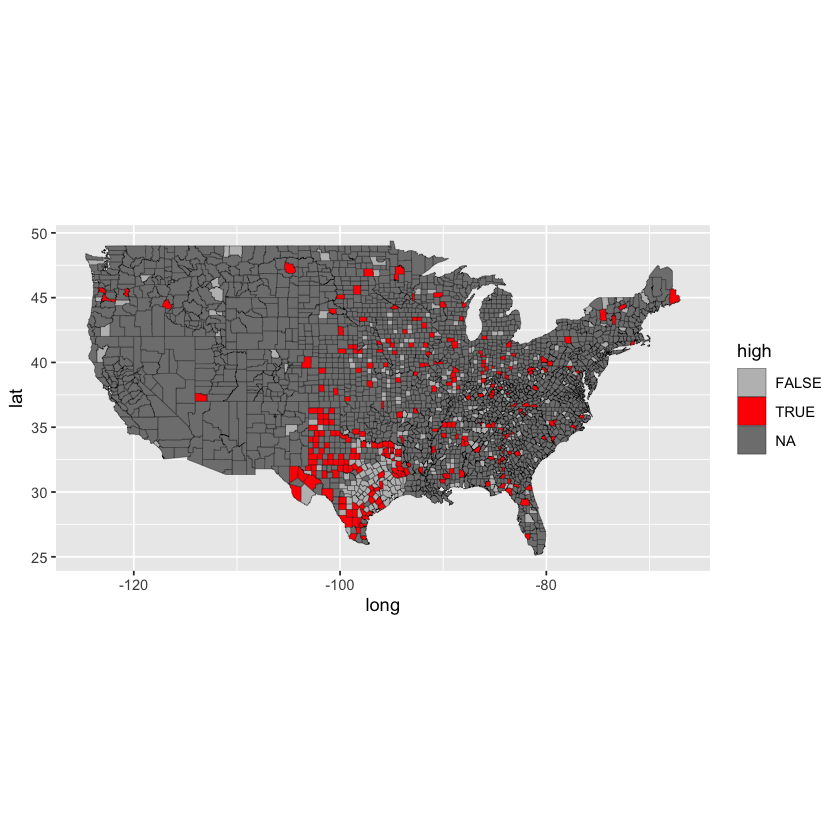

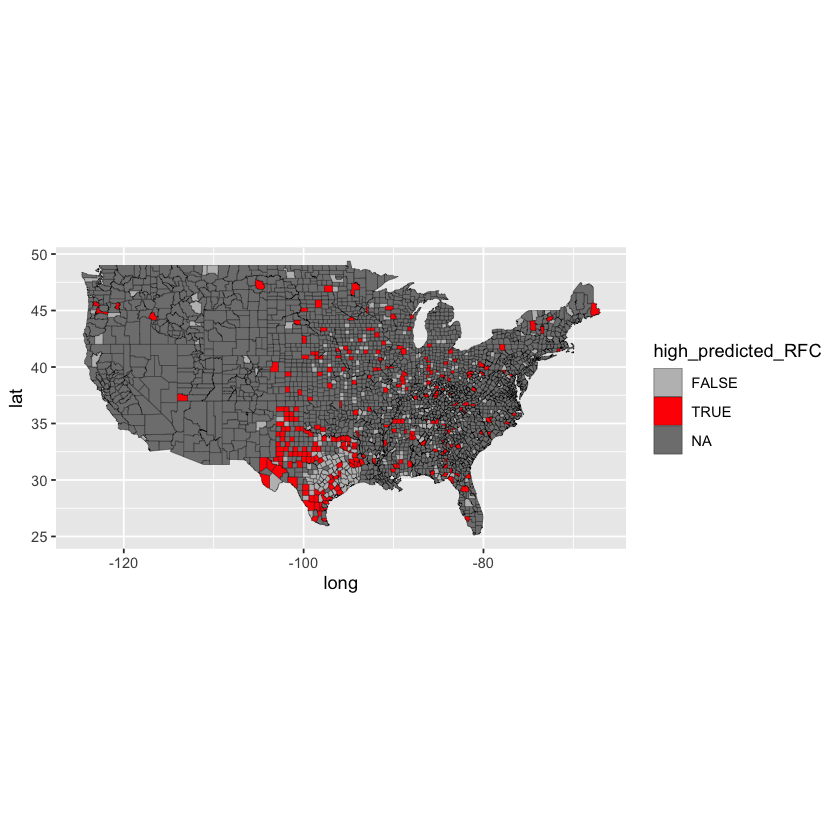

In [986]:
# Ground truth
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

# Predictions
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high_predicted_RFC), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

Just by visually looking at these two heat maps, we can see that the model predictions on the deaths per 10000 for the counties are very similar to the ground truth. This indicates a high model performance.

In [996]:
# Confusion Matrix
confusionMatrix(data = dataset_test$high_predicted_RFC, ref = dataset_test$high)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    88    0
     TRUE      0   93
                                     
               Accuracy : 1          
                 95% CI : (0.9798, 1)
    No Information Rate : 0.5138     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4862     
         Detection Rate : 0.4862     
   Detection Prevalence : 0.4862     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : FALSE      
                                     

The true positive is 88 and true negative is 93 which indicates high accuracy.  
The accuracy is 100%. The kappa value of 1 indicates perfect agreement between the model's predictions and the actual values.  

# K-Nearest Neighbor Classifier

In [998]:
# K-nearest neighbor classifier (k values: 1, 3, 5, 7, 9), training method as 10 folds cross validation
knn_classifier <- dataset_train_for_model %>% 
    train(high ~ .,
          method = "knn",
          data = .,
          preProcess = "scale",
          tuneGrid = data.frame(k = c(1, 3, 5, 7, 9)),
          trControl = trainControl(method = "cv", number=10))

knn_classifier

k-Nearest Neighbors 

23 samples
14 predictors
 2 classes: 'FALSE', 'TRUE' 

Pre-processing: scaled (14) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20, 21, 21, 20, 21, 20, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa
  1  0.8666667  0.74 
  3  0.9166667  0.84 
  5  0.8833333  0.78 
  7  0.8666667  0.74 
  9  0.8666667  0.74 

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 3.

In [1000]:
# Ranking of the features for predictions in the model
varImp(knn_classifier)

ROC curve variable importance

                                              Importance
deaths_per_10000                                 100.000
death_per_case                                    95.161
commute                                           79.032
worked_at_home                                    77.419
income_50K_100K                                   70.968
hispanic_pop                                      67.742
cases_per_10000                                   53.226
black_pop                                         43.548
total_pop                                         41.935
workplaces_percent_change_from_baseline           25.806
transit_stations_percent_change_from_baseline     12.903
female_50_above                                    8.065
male_50_above                                      8.065
rent_over_50_percent                               0.000

## Accuracy & Evaluation

In [1003]:
 # Use the model to predict on the test dataset. Add predicted values to column "high_predicted_knn"
dataset_test$high_predicted_knn <- predict(knn_classifier, dataset_test_RFC)

In [1005]:
#Check if the column was added
names(dataset_test)

[1] "county_name"                                  
 [2] "total_pop"                                    
 [3] "hispanic_pop"                                 
 [4] "black_pop"                                    
 [5] "male_50_above"                                
 [6] "female_50_above"                              
 [7] "income_50K_100K"                              
 [8] "rent_over_50_percent"                         
 [9] "commute"                                      
[10] "worked_at_home"                               
[11] "transit_stations_percent_change_from_baseline"
[12] "workplaces_percent_change_from_baseline"      
[13] "cases_per_10000"                              
[14] "deaths_per_10000"                             
[15] "death_per_case"                               
[16] "high"                                         
[17] "high_predicted_RFC"                           
[18] "high_predicted_knn"

Joining with `by = join_by(county)`


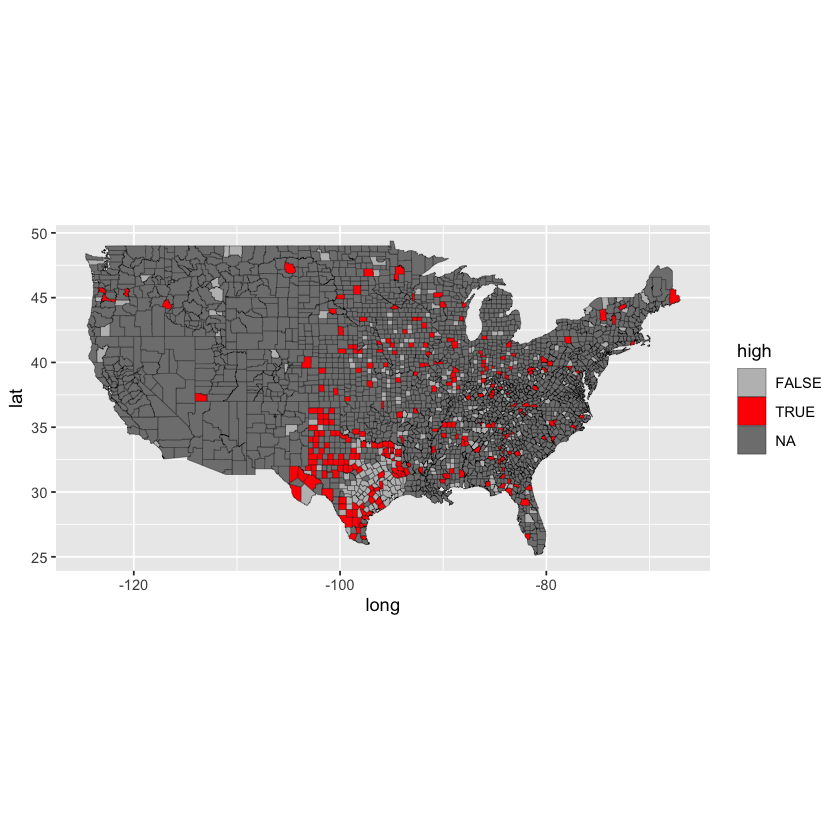

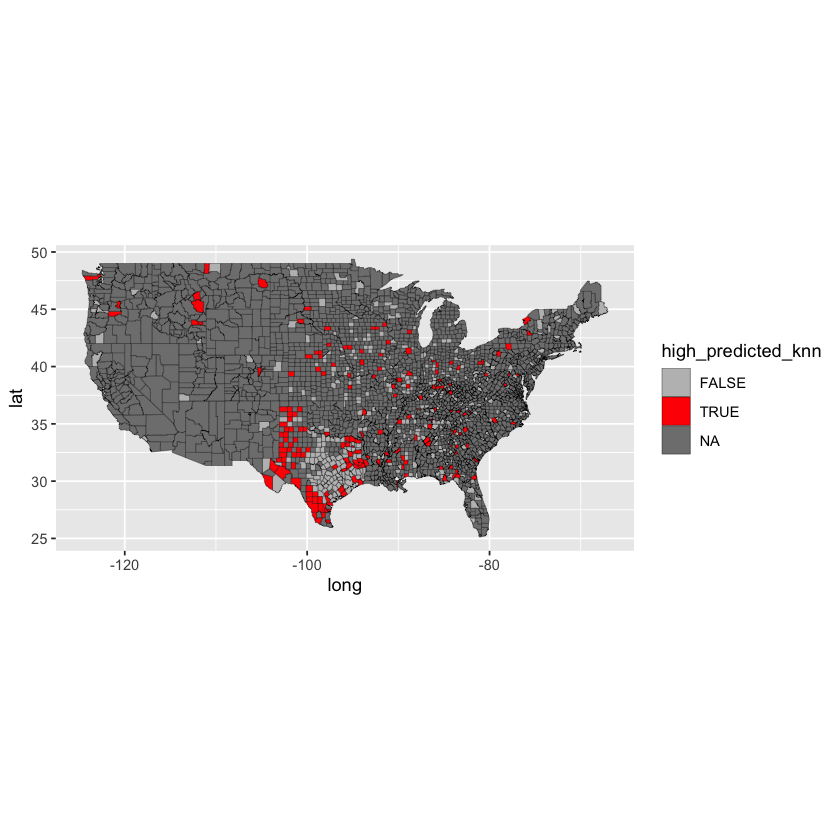

In [1007]:
# Visualize the prediction results
counties_test <- counties %>% left_join(dataset_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

# Ground truth
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

# Predictions
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high_predicted_knn), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

Less accurate than previous model.

In [1010]:
# Confusion Matrix
confusionMatrix(data = dataset_test$high_predicted_knn, ref = dataset_test$high)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    75   33
     TRUE     13   60
                                          
               Accuracy : 0.7459          
                 95% CI : (0.6759, 0.8075)
    No Information Rate : 0.5138          
    P-Value [Acc > NIR] : 1.35e-10        
                                          
                  Kappa : 0.4944          
                                          
 Mcnemar's Test P-Value : 0.005088        
                                          
            Sensitivity : 0.8523          
            Specificity : 0.6452          
         Pos Pred Value : 0.6944          
         Neg Pred Value : 0.8219          
             Prevalence : 0.4862          
         Detection Rate : 0.4144          
   Detection Prevalence : 0.5967          
      Balanced Accuracy : 0.7487          
                                          
       'Positive' Class : FALSE           
                     

# Gradient Boosted Decision Trees (xgboost)

In [710]:
install.packages("xgboost")


The downloaded binary packages are in
	/var/folders/1d/53kd6zpn72jbr2x8b7thj7t00000gn/T//RtmpGtuoA0/downloaded_packages


In [712]:
library(xgboost)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [1012]:
# Using 5 tuning parameter combinations, 10 folds CV, and some tuning grid for hyperparameters tuning
xgboost_classifier <- dataset_train_for_model %>%
  train(high ~ .,
        method = "xgbTree",
        data = .,
        tuneLength = 5,
        trControl = trainControl(method = "cv"),
        tuneGrid = expand.grid(
          nrounds = 20,
          max_depth = 3,
          colsample_bytree = .6,
          eta = 0.1,
          gamma = 0,
          min_child_weight = 1,
          subsample = .5
        )
  )
xgboost_classifier

eXtreme Gradient Boosting 

23 samples
14 predictors
 2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 21, 21, 21, 21, 21, 20, ... 
Resampling results:

  Accuracy  Kappa
  1         1    

Tuning parameter 'nrounds' was held constant at a value of 20
Tuning
 held constant at a value of 1
Tuning parameter 'subsample' was held
 constant at a value of 0.5

## Accuracy & Evaluation

In [1014]:
 # Use the model to predict on the test dataset. Add predicted values to column "high_predicted_xgboost"
dataset_test$high_predicted_xgboost <- predict(xgboost_classifier, dataset_test_for_model)

Joining with `by = join_by(county)`


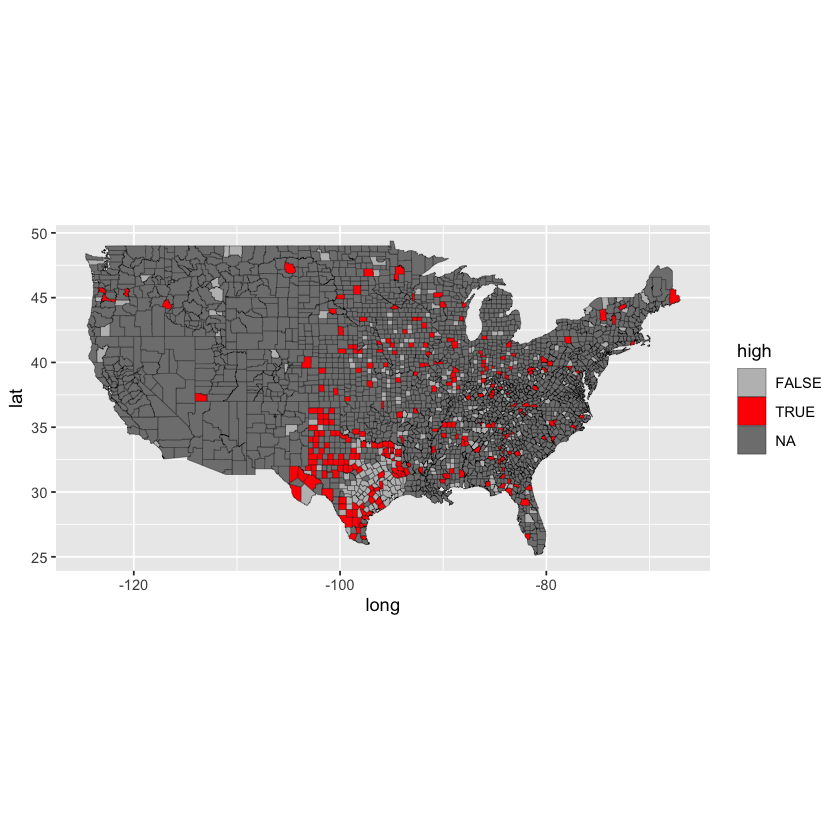

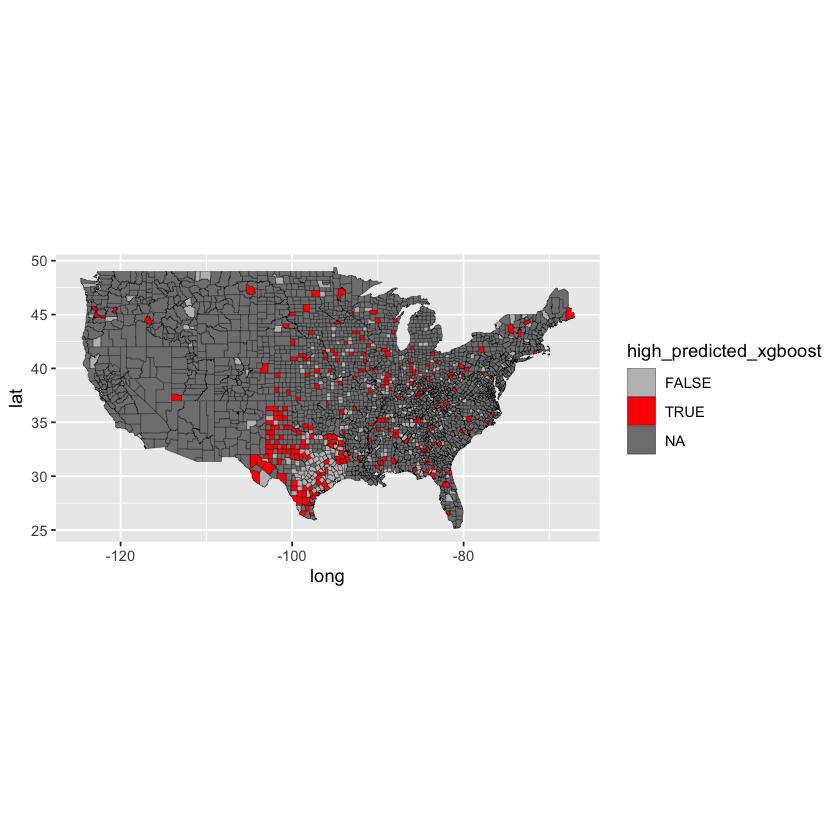

In [1016]:
# Visualize the prediction results
counties_test <- counties %>% left_join(dataset_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

# Ground truth
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

# Predictions
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high_predicted_xgboost), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

In [1018]:
# Confusion Matrix
confusionMatrix(data = dataset_test$high_predicted_xgboost, ref = dataset_test$high)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    88    2
     TRUE      0   91
                                          
               Accuracy : 0.989           
                 95% CI : (0.9607, 0.9987)
    No Information Rate : 0.5138          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9779          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9785          
         Pos Pred Value : 0.9778          
         Neg Pred Value : 1.0000          
             Prevalence : 0.4862          
         Detection Rate : 0.4862          
   Detection Prevalence : 0.4972          
      Balanced Accuracy : 0.9892          
                                          
       'Positive' Class : FALSE           
                     

# Support Vector Machines

In [723]:
install.packages("kernlab")


The downloaded binary packages are in
	/var/folders/1d/53kd6zpn72jbr2x8b7thj7t00000gn/T//RtmpGtuoA0/downloaded_packages


In [725]:
library(kernlab)


Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha




In [1022]:
# Using 5 tuning parameter combinations, 10 folds CV.
svm <- dataset_train_for_model %>%
  train(high ~ .,
        method = "svmLinear",
        data = .,
        tuneLength = 5,
        trControl = trainControl(method = "cv"))
svm

Support Vector Machines with Linear Kernel 

23 samples
14 predictors
 2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20, 21, 21, 21, 20, 21, ... 
Resampling results:

  Accuracy   Kappa
  0.8666667  0.74 

Tuning parameter 'C' was held constant at a value of 1

In [1024]:
# Ranking of the features for predictions in the model
varImp(svm)

ROC curve variable importance

                                              Importance
deaths_per_10000                                 100.000
death_per_case                                    95.161
commute                                           79.032
worked_at_home                                    77.419
income_50K_100K                                   70.968
hispanic_pop                                      67.742
cases_per_10000                                   53.226
black_pop                                         43.548
total_pop                                         41.935
workplaces_percent_change_from_baseline           25.806
transit_stations_percent_change_from_baseline     12.903
female_50_above                                    8.065
male_50_above                                      8.065
rent_over_50_percent                               0.000

## Accuracy & Evaluation

In [1027]:
 # Use the model to predict on the test dataset. Add predicted values to column "high_predicted_xgboost_svm"
dataset_test$high_predicted_xgboost_svm <- predict(svm, dataset_test_for_model)

Joining with `by = join_by(county)`


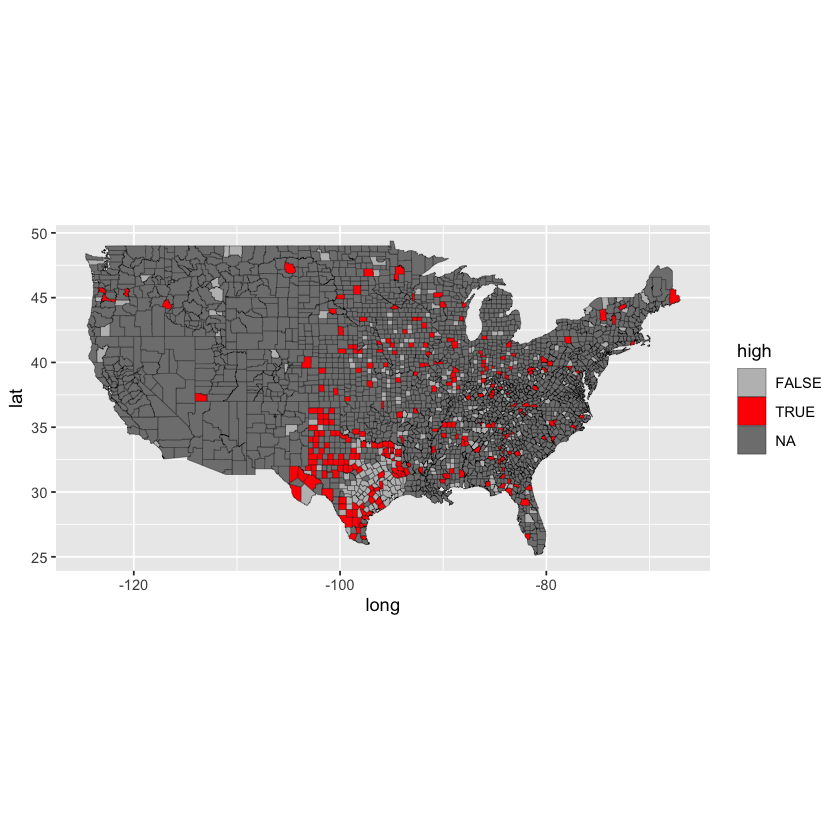

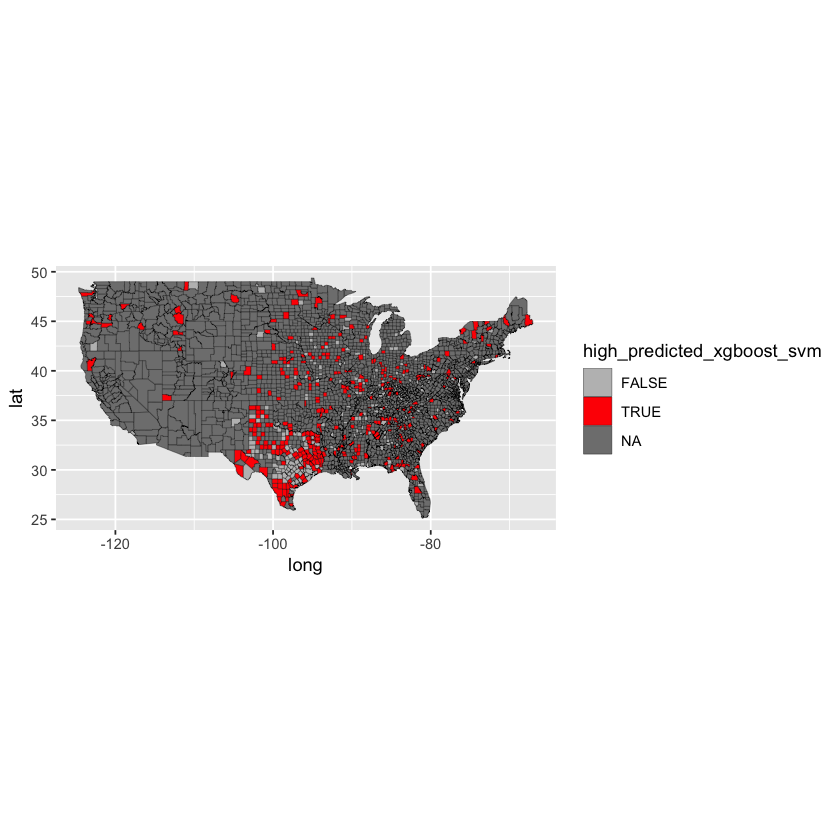

In [1029]:
# Visualize the prediction results
counties_test <- counties %>% left_join(dataset_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

# Ground truth
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

# Predictions
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high_predicted_xgboost_svm), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

In [1031]:
# Confusion Matrix
confusionMatrix(data = dataset_test$high_predicted_xgboost_svm, ref = dataset_test$high)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    59   21
     TRUE     29   72
                                          
               Accuracy : 0.7238          
                 95% CI : (0.6525, 0.7875)
    No Information Rate : 0.5138          
    P-Value [Acc > NIR] : 6.642e-09       
                                          
                  Kappa : 0.4457          
                                          
 Mcnemar's Test P-Value : 0.3222          
                                          
            Sensitivity : 0.6705          
            Specificity : 0.7742          
         Pos Pred Value : 0.7375          
         Neg Pred Value : 0.7129          
             Prevalence : 0.4862          
         Detection Rate : 0.3260          
   Detection Prevalence : 0.4420          
      Balanced Accuracy : 0.7223          
                                          
       'Positive' Class : FALSE           
                     

# Artificial Neural Network (ANN)


In [1033]:
# Using 5 tuning parameter combinations, 10 folds CV.
nnet <- dataset_train_for_model %>%
  train(high ~ .,
        method = "nnet",
        data = .,
        tuneLength = 5,
        trControl = trainControl(method = "cv"),
       trace = FALSE)
nnet

Neural Network 

23 samples
14 predictors
 2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 21, 21, 21, 20, 21, 21, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa
  1     0e+00  0.5166667   0.00
  1     1e-04  0.5666667   0.10
  1     1e-03  0.6000000   0.24
  1     1e-02  0.6500000   0.32
  1     1e-01  0.6833333   0.30
  3     0e+00  0.4833333   0.00
  3     1e-04  0.5666667   0.10
  3     1e-03  0.6333333   0.20
  3     1e-02  0.6500000   0.20
  3     1e-01  0.7166667   0.44
  5     0e+00  0.5666667   0.10
  5     1e-04  0.6833333   0.34
  5     1e-03  0.7166667   0.44
  5     1e-02  0.6500000   0.30
  5     1e-01  0.6333333   0.25
  7     0e+00  0.5333333   0.10
  7     1e-04  0.6666667   0.30
  7     1e-03  0.7000000   0.35
  7     1e-02  0.6333333   0.25
  7     1e-01  0.6333333   0.24
  9     0e+00  0.4333333  -0.10
  9     1e-04  0.6666667   0.30
  9     1e-03  0.6666667   0.30
  9

In [1035]:
# Ranking of the features for predictions in the model
varImp(nnet)

nnet variable importance

                                                Overall
total_pop                                     100.00000
deaths_per_10000                               28.23063
transit_stations_percent_change_from_baseline  22.13597
cases_per_10000                                17.94752
workplaces_percent_change_from_baseline         8.42491
black_pop                                       0.31071
commute                                         0.26925
male_50_above                                   0.15165
hispanic_pop                                    0.14587
female_50_above                                 0.10960
income_50K_100K                                 0.06256
death_per_case                                  0.05928
worked_at_home                                  0.02038
rent_over_50_percent                            0.00000

## Accuracy & Evaluation

In [1038]:
 # Use the model to predict on the test dataset. Add predicted values to column "high_predicted_nnet"
dataset_test$high_predicted_nnet <- predict(nnet, dataset_test_for_model)

Joining with `by = join_by(county)`


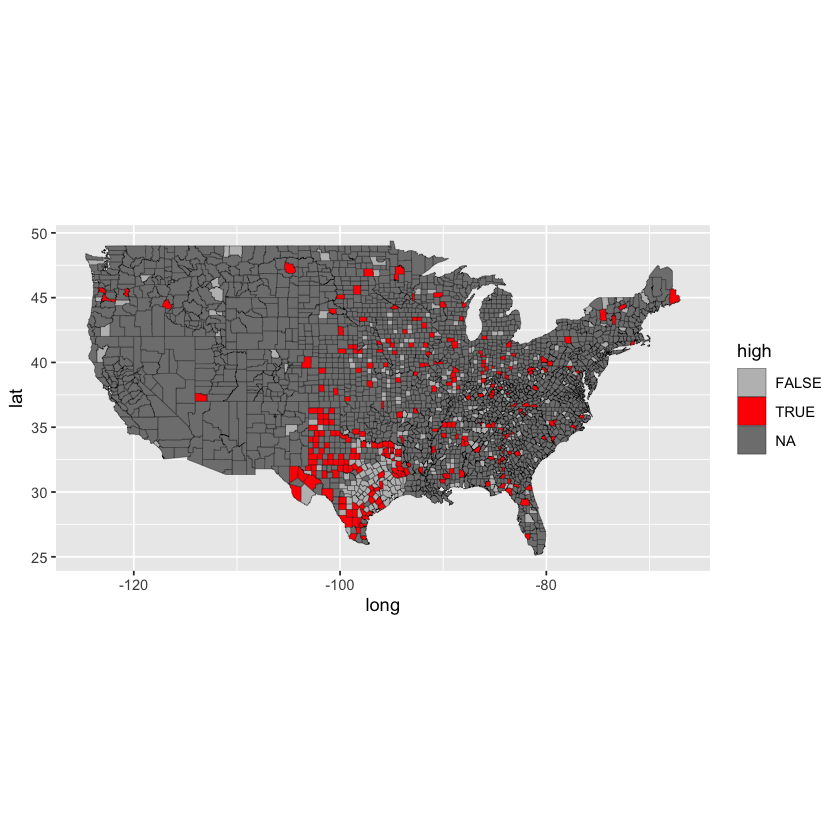

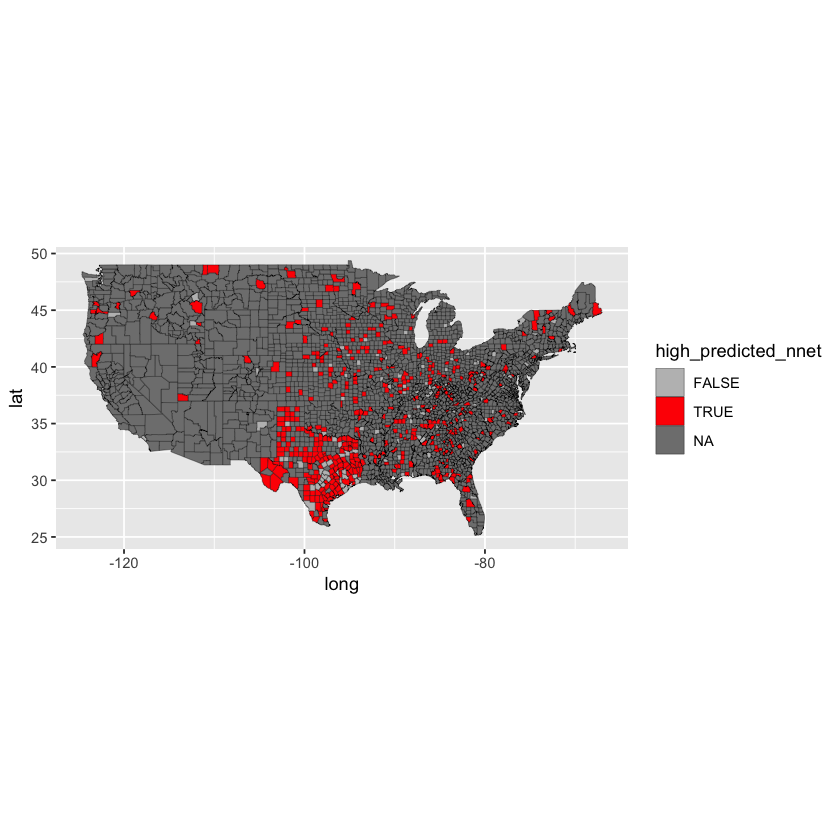

In [1040]:
# Visualize the prediction results
counties_test <- counties %>% left_join(dataset_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

# Ground truth
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

# Predictions
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high_predicted_nnet), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

In [1042]:
# Confusion Matrix
confusionMatrix(data = dataset_test$high_predicted_nnet, ref = dataset_test$high)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    27    5
     TRUE     61   88
                                          
               Accuracy : 0.6354          
                 95% CI : (0.5607, 0.7055)
    No Information Rate : 0.5138          
    P-Value [Acc > NIR] : 0.0006459       
                                          
                  Kappa : 0.2575          
                                          
 Mcnemar's Test P-Value : 1.288e-11       
                                          
            Sensitivity : 0.3068          
            Specificity : 0.9462          
         Pos Pred Value : 0.8438          
         Neg Pred Value : 0.5906          
             Prevalence : 0.4862          
         Detection Rate : 0.1492          
   Detection Prevalence : 0.1768          
      Balanced Accuracy : 0.6265          
                                          
       'Positive' Class : FALSE           
                     

# Model Comparison

In [1044]:
model_comparison <- resamples(list(
    kNearestNeighbors = knn_classifier,
    SVM = svm,
    RandomForest = random_forest_classifier,
    XGBoost = xgboost_classifier,
    ANN = nnet
    ))

summary(model_comparison)


Call:
summary.resamples(object = model_comparison)

Models: kNearestNeighbors, SVM, RandomForest, XGBoost, ANN 
Number of resamples: 10 

Accuracy 
                       Min.   1st Qu. Median      Mean 3rd Qu. Max. NA's
kNearestNeighbors 0.5000000 1.0000000      1 0.9166667       1    1    0
SVM               0.5000000 0.7500000      1 0.8666667       1    1    0
RandomForest      0.6666667 1.0000000      1 0.9666667       1    1    0
XGBoost           1.0000000 1.0000000      1 1.0000000       1    1    0
ANN               0.5000000 0.5416667      1 0.8166667       1    1    0

Kappa 
                  Min. 1st Qu. Median Mean 3rd Qu. Max. NA's
kNearestNeighbors  0.0    1.00      1 0.84       1    1    0
SVM                0.0    0.55      1 0.74       1    1    0
RandomForest       0.4    1.00      1 0.94       1    1    0
XGBoost            1.0    1.00      1 1.00       1    1    0
ANN                0.0    0.10      1 0.64       1    1    0


Accuracy:  
kNearestNeighbors: The mean accuracy is 0.92, which is relatively high. The range of accuracy is from 0.50 (minimum) to 1 (maximum), meaning the model sometimes performs poorly but also does very well in some cases.  
SVM: The mean accuracy is 0.87, with a minimum of 0.50 and a maximum of 1. This shows that SVM has decent performance but is not always consistent.  
RandomForest: The mean accuracy is 0.97, and the accuracy is low as 0.67 and high as 1 indicating that its performance is also very unstable. 
XGBoost: The mean accuracy is 1 and its lowest performance is also 1. This indicates that so far this is the best performing model.
ANN: The mean accuracy is 0.82 but this classifier also swings alot as its lowest performance is 0.5 while its highest is 1.

Kappa:  
kNearestNeighbors: The mean Kappa is 0.84, which indicates good agreement, with the model performing perfectly (Kappa = 1) in some resamples but poorly (Kappa = 0) in others.  
SVM: The mean Kappa is 0.74, which is lower than k-NN. The model performs better in some cases but still has some poor results (Kappa = 0).  
RandomForest: The mean Kappa is 0.94, which is high, indicating strong performance and good agreement between the predicted and actual value.  
XGBoost: The mean Kappa is 1 which is best value so far. It's lowest value is also 1 indicating this could be the best performing model.
ANN: The mean Kappa is 0.64. Its perormance also swings alot from 0 to 1. 

Overall:  
XGBoost is the top performer in both accuracy and Kappa, suggesting it has strong and consistent predictive power.

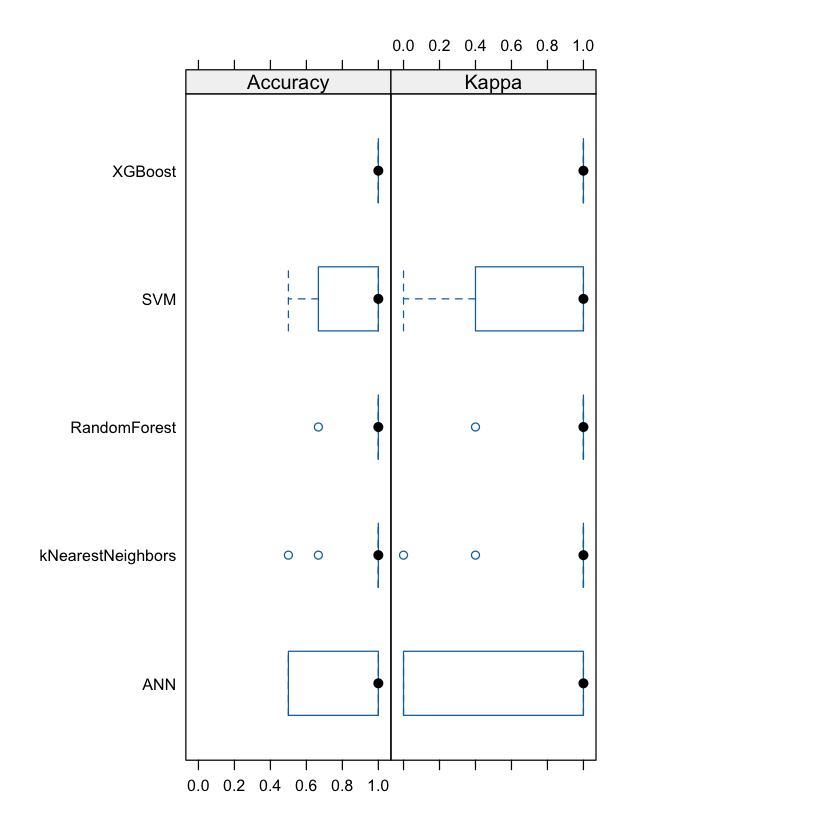

In [1047]:
# Visualization of comparison based on accuracy and Kappa scores
bwplot(model_comparison, layout = c(3, 1))

In [1049]:
# Difference in performance between consecutive classifiers
diff_model_comparison <- diff(model_comparison)

summary(diff_model_comparison)


Call:
summary.diff.resamples(object = diff_model_comparison)

p-value adjustment: bonferroni 
Upper diagonal: estimates of the difference
Lower diagonal: p-value for H0: difference = 0

Accuracy 
                  kNearestNeighbors SVM      RandomForest XGBoost  ANN     
kNearestNeighbors                    0.05000 -0.05000     -0.08333  0.10000
SVM               1.0000                     -0.10000     -0.13333  0.05000
RandomForest      1.0000            1.0000                -0.03333  0.15000
XGBoost           1.0000            0.8684   1.0000                 0.18333
ANN               1.0000            1.0000   1.0000       0.3987           

Kappa 
                  kNearestNeighbors SVM    RandomForest XGBoost ANN  
kNearestNeighbors                    0.10  -0.10        -0.16    0.20
SVM               1.0000                   -0.20        -0.26    0.10
RandomForest      1.0000            1.0000              -0.06    0.30
XGBoost           1.0000            0.8978 1.0000          

Looking at the difference at the accuracy scores between the classifiers, we see that the kNearestNeighbors is more accurate than SVM and ANN but less accurate than the others. SVM is only more accurate than ANN while less accurate to rest of the models. RandomForest is less accurate than XGBoost but more accurate than rest of the models. XGBoost is more accurate than rest of the models. The same is true for the Kappa values too. Thus, this indicates that the XGBoost is still the best performing model.